<a href="https://colab.research.google.com/github/Huhan001/tensorflowcertification/blob/main/ColoredCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os #for file location showing
import matplotlib.pyplot as plt
import numpy 
import pandas

In [2]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#data loading
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zipdir = tensorflow.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = URL, extract = True)

68606236/68606236 [==============================] - 2s 0us/step


In [10]:
dirpath = os.path.dirname(zipdir)
!find $dirpath -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


['cats_and_dogs_filtered.zip', 'cats_and_dogs_filtered']

In [9]:
base_dir = os.path.join(os.path.dirname(zipdir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

traindircats = os.path.join(train_dir,'cats')
traindirdogs = os.path.join(train_dir, 'dogs')

validation_dir_dogs = os.path.join(validation_dir, 'dogs')
validation_dir_cats = os.path.join(validation_dir, 'cats')


In [11]:
num_cats_tr = len(os.listdir(traindircats))
num_dogs_tr = len(os.listdir(traindirdogs))

num_cats_val = len(os.listdir(validation_dir_cats))
num_dogs_val = len(os.listdir(validation_dir_dogs))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [12]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [13]:
#after inputing data and preparing data now lets set our batch size
batch = 100
image_shape = 150

In [14]:
#changing image into tensorflow images floating 
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [17]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (image_shape, image_shape),
                                                           class_mode = 'binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(image_shape,image_shape), #(150,150)
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])  # Plot images 0-4

In [25]:
from pickle import LONG4
#build layers
l1 = tensorflow.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3))
l10 = tensorflow.keras.layers.MaxPool2D(2,2)
l2 = tensorflow.keras.layers.Conv2D(64, (3,3), activation = 'relu')
l20 = tensorflow.keras.layers.MaxPool2D(2,2)
l3 = tensorflow.keras.layers.Conv2D(128, (3,3), activation = 'relu')
l30 = tensorflow.keras.layers.MaxPool2D(2,2)
l4 = tensorflow.keras.layers.Conv2D(128, (3,3), activation = 'relu')
l40 = tensorflow.keras.layers.MaxPool2D(2,2)

#build model
model = tensorflow.keras.Sequential([l1,l10,l2,l20,l3,l30,l4,l40,
                                    tensorflow.keras.layers.Flatten(),
                                    tensorflow.keras.layers.Dense(512, activation = 'relu'),
                                    tensorflow.keras.layers.Dense(2, activation = 'softmax')])

In [26]:
#compile
model.compile(optimizer = 'adam',
              loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
#train
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(numpy.ceil(total_train / float(batch))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(numpy.ceil(total_val / float(batch)))
)

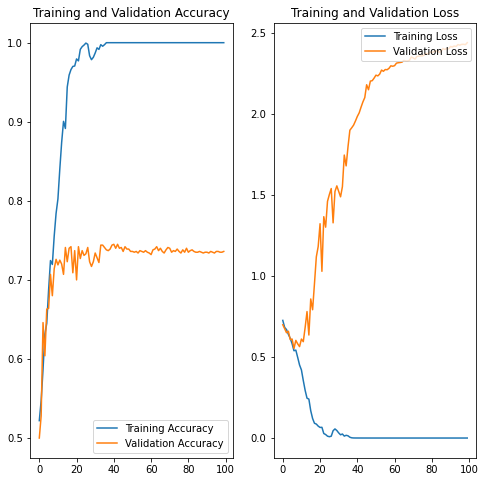

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()